In [2]:
# Initial Imports
import numpy as np
import pandas as pd 
import math 
import time
import matplotlib.pyplot as plt
%matplotlib inline
#matplotlib style options
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15, 4)

---------------
# Initialization 

In [130]:
# Loading csv data into pandas dataframe
df_corona = pd.read_csv('./Data/covid_19_clean_complete.csv')

# Converting the date format from object to datatime
df_corona['Date'] = pd.to_datetime(df_corona['Date'])

-------------------
# World View

First, a general analysis of the corona impact world wide is made

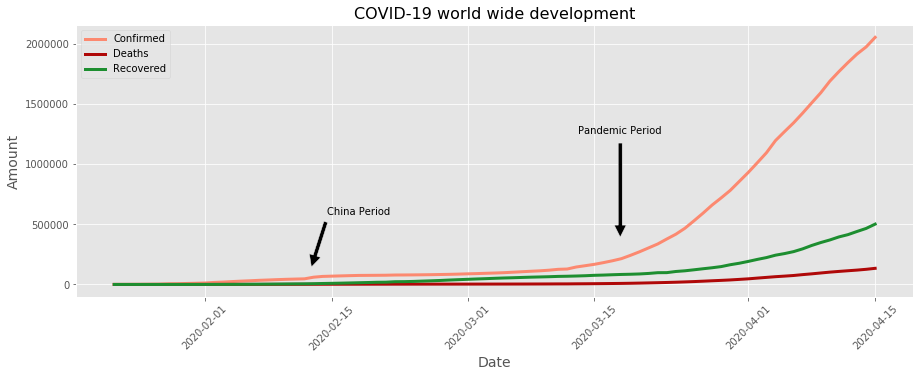

In [131]:
# Constructing a dataframe with the total sum of Confirmed, Deaths and recoved grouped by each date
Time_stats = df_corona[["Confirmed","Deaths","Recovered","Date"]].groupby(["Date"]).sum()

# Plot of COVID-19 Development
plt.figure(figsize=[15,5])
plt.title("COVID-19 world wide development",fontsize=16)
plt.xlabel('Date',fontsize=14)
plt.ylabel('Amount',fontsize=14)
plt.plot(Time_stats.index,Time_stats['Confirmed'],c="#FC8970", linewidth=3)
plt.plot(Time_stats.index,Time_stats['Deaths'],c='#AF0808', linewidth=3)
plt.plot(Time_stats.index,Time_stats['Recovered'],c='#1D8E30', linewidth=3)
plt.xticks(rotation=45)
plt.annotate('China Period', xy=(0.28, 0.1),xytext=(0.3, 0.3), xycoords='axes fraction',
             arrowprops=dict(facecolor='black', shrink=0.05))

plt.annotate('Pandemic Period', xy=(0.65, 0.2),xytext=(0.6, 0.6), xycoords='axes fraction',
             arrowprops=dict(facecolor='black', shrink=0.05))
plt.legend(('Confirmed', 'Deaths', 'Recovered'))
plt.show()

From the plot of the world wide corona development we see that the china outbreak was very little compared to the pandemic outbreak starting in March. We also see that the outbreak most likely follow a sigmoid distribution with an expenential growth at the beginning before gradually slowing down. 

Since the number of confirmed cases looks to be growing exponentially is a chart with a logarithmic y-axis also made to give a better comparison of the relation ship between confirmed cases, deaths and recoveries.

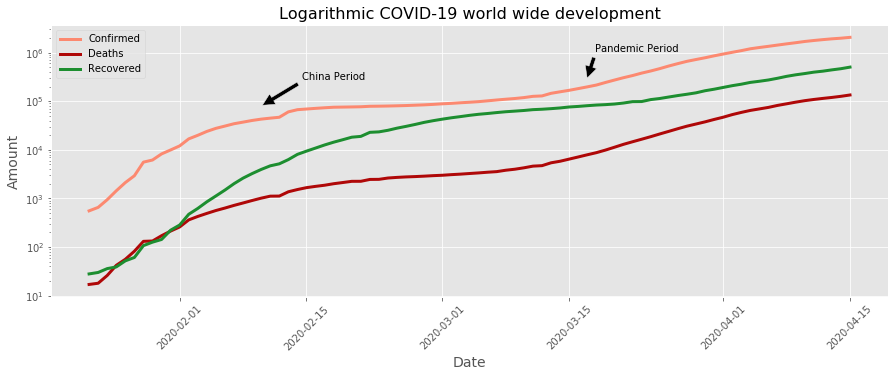

In [132]:
# log transformation of y axis. 
plt.figure(figsize=[15,5])
plt.title("Logarithmic COVID-19 world wide development",fontsize=16)
plt.xlabel('Date',fontsize=14)
plt.ylabel('Amount',fontsize=14)
plt.plot(Time_stats.index,Time_stats['Confirmed'],c="#FC8970", linewidth=3)
plt.plot(Time_stats.index,Time_stats['Deaths'],c='#AF0808', linewidth=3)
plt.plot(Time_stats.index,Time_stats['Recovered'],c='#1D8E30', linewidth=3)
plt.xticks(rotation=45)
plt.annotate('China Period', xy=(0.25, 0.7),xytext=(0.3, 0.8), xycoords='axes fraction',
             arrowprops=dict(facecolor='black', shrink=0.05))

plt.annotate('Pandemic Period', xy=(0.64 , 0.8),xytext=(0.65, 0.9), xycoords='axes fraction',
             arrowprops=dict(facecolor='black', shrink=0.05))
plt.legend(('Confirmed', 'Deaths', 'Recovered'))
plt.yscale("log")


plt.show()

The logarithmic plot show a more or less stable relation ship the number of deaths and the number of cases, and thereby a stable mortality rate. 

In order to take a more detailed look of the behaivior of the mortality rate is the mortality plottet below. 

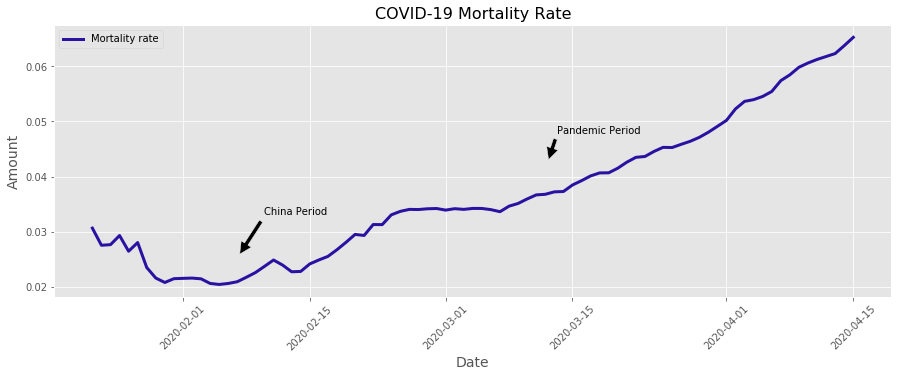

In [133]:
# Plotting mortality rate gived by relationship bewteen deaths and confirmed. 
plt.figure(figsize=[15,5])
plt.title("COVID-19 Mortality Rate",fontsize=16)
plt.xlabel('Date',fontsize=14)
plt.ylabel('Amount',fontsize=14)
plt.plot(Time_stats.index,(Time_stats['Deaths']/Time_stats['Confirmed']),c="#2812A1", linewidth=3)
plt.xticks(rotation=45)
plt.annotate('China Period', xy=(0.22, 0.15),xytext=(0.25, 0.3), xycoords='axes fraction',
             arrowprops=dict(facecolor='black', shrink=0.05))

plt.annotate('Pandemic Period', xy=(0.59, 0.5),xytext=(0.6, 0.6), xycoords='axes fraction',
             arrowprops=dict(facecolor='black', shrink=0.05))
plt.legend(('Mortality rate',))
plt.show()

This plot shows som very interesting results. The mortality rate was between 2%-3% during the outbreak in china, but since the pandemic outbreak has startet has the mortality rate increased a lot a is i mid april increased to above 6%. What has caused this sudden increase in the mortality rate? Below we give some possible scenarios. 

**1)** Virus has become more agressive/dangourous - Nothing indecates that this has happened. 

**2)** Health care collaps is causing increase - Health care collaps is sure causing many deaths, but the health care in china also collaps, so it doesnt explain the sudden increase

**3)** Countries is overwhelmed by virus and dont have equipment or recourses to test agressevily enough which causes a huge dark number of people who is actual infected but doesnt count in the statistics.

### Heatmaps

Before diving into each specific country are heatmaps of the world used to both give a nice overview of the world situation at the moment while at the same time giving the viewer the possiblity to easy and quickly compare two or several countries of interest. 

The first heatmap looks at the number of deaths in each country. The number of deaths has been chosen as the measure since it is assumed to be a lot more precise than the number of confirmed cases. The heatmap is by focusing on casualties futhermore able to clearly show the criticallity of the situations around the world. 

In [87]:
# Preparing dataframe used to make heatmaps
# Grouping by date and country to get Confirmed and Deaths for the whole country inclusive regions
Date_Country_stats = df_corona[["Confirmed","Deaths","Recovered","Date","Country/Region"]].groupby(["Date","Country/Region"]).sum()
Date_Country_stats['Mortalityrate'] = Date_Country_stats['Deaths']/Date_Country_stats['Confirmed']
Date_Country_stats['LogDeaths'] = np.log(Date_Country_stats['Deaths']+1)

# Defining newest date
target_date = max(Date_Country_stats.index.get_level_values(0))
# Selecting the newest date only
Newest_Date_Country_stats = Date_Country_stats[Date_Country_stats.index.get_level_values(0) == target_date]

In [88]:
# Plotting death count heatmap for the newest date
import plotly.express as px
fig = px.choropleth(Newest_Date_Country_stats, locations=Newest_Date_Country_stats.index.get_level_values(1), 
                    locationmode='country names', color="LogDeaths", 
                    hover_name=Newest_Date_Country_stats.index.get_level_values(1),
                    hover_data=["Confirmed", 'Deaths'],range_color=[0, max(Newest_Date_Country_stats["LogDeaths"])], 
                    color_continuous_scale='reds',
                    title='World map of casaulties')
fig.show()

The world map shows that US and Europe both are in some critical situations with many deaths. Africa is on the other hand doing good for now.

The above heatmap gives a good look at how critical the situation is up until now. But in order to estimate where the situation might have the potiential to be critical in the future is the mortality rate in the different countries plotted. This will indicate both if a collaps of the healt care system in the country is happening and causing high mortality rate or if the country not is prepared for massive testing, which also can cause high mortality rate in statistics. 

In [91]:
# Plotting Mortality rate
fig = px.choropleth(Newest_Date_Country_stats, locations=Newest_Date_Country_stats.index.get_level_values(1), 
                    locationmode='country names', color="Mortalityrate", 
                    hover_name=Newest_Date_Country_stats.index.get_level_values(1),
                    hover_data=["Confirmed", 'Mortalityrate'],range_color=[0, 0.25], 
                    color_continuous_scale=[[0, 'rgb(245,245,255)'], [1, 'rgb(0,0,255)']],
                    title='World map of Mortality Rate')
fig.show()

The mortality rate world map shows really high mortality rate in Africa. How ever when hovering over the chart most african countryis stills has very low amount of deaths. therefor is it assumed that the high mortality rate in africa is due to lack of testing opportunities. 


Both heapmaps above show the current situation. To show how and at was pace the whole corona situation unfolded is a gif with number of deaths over time made below. From the gif is can be seen that all non asian countries actually had a lot of time to react while the virus was kept in mainly china. 
**!!!Insert GIF!!!**

In [92]:
#import os

#if not os.path.exists("images"):
#    os.mkdir("images")





In [ ]:
##install this
##conda install -c plotly plotly-orca==1.2.1 psutil requests
#indx = 1
#for d in Date_Country_stats.index.get_level_values(0).unique(): 
#    
#    temp = Date_Country_stats[Date_Country_stats.index.get_level_values(0) == d]
#    fig = px.choropleth(temp, locations=Newest_Date_Country_stats.index.get_level_values(1), 
#                    locationmode='country names', color="LogDeaths", 
#                    hover_name=Newest_Date_Country_stats.index.get_level_values(1),
#                    hover_data=["Confirmed", 'Deaths'],range_color=[0, max(Newest_Date_Country_stats["LogDeaths"])], 
#                   color_continuous_scale='reds',
#                    title='World map of casaulties ' + str(d))
#    fig.write_image(str(indx) + ".png")
#    indx=indx+1

In [ ]:
#import imageio
#images = []
#files = os.listdir('./images')
#
#for filename in range(1,len(files)):
#    if filename != '.ipynb_checkpoints':
#        images.append(imageio.imread('./images/' + str(filename)+ '.png'))
#kargs = { 'duration': 0.5 }
#imageio.mimsave('Corona_world_map.gif', images, 'GIF', **kargs )

----------
# Country view

Before deep diving into the analysis of some focused countries will a general analysis for all countries affected by Covid-19 be accessible below. The goal of the analysis is the compare the countries with each other and thereby find countries of interest for futher analysis. 

In [191]:
# Dataframe used for analysis is constructed. 
Country_Time_stats = df_corona[["Confirmed","Deaths","Recovered","Date","Country/Region"]].groupby(["Country/Region","Date"]).sum()
Country_Time_stats['Country'] = Country_Time_stats.index.get_level_values(0)
Country_Time_stats['Date'] = Country_Time_stats.index.get_level_values(1)

Below is the number of confirmed cases, deaths and recovered shown. starting at january 22. until now (mid april).  
The same sigmoid distribution starting with an expenential growth can more or less be seen is the case for every country. China is clearly the only country that so far has manages to bend the bend the curve completely but other countries like Iceland and South Korea are also doing good.

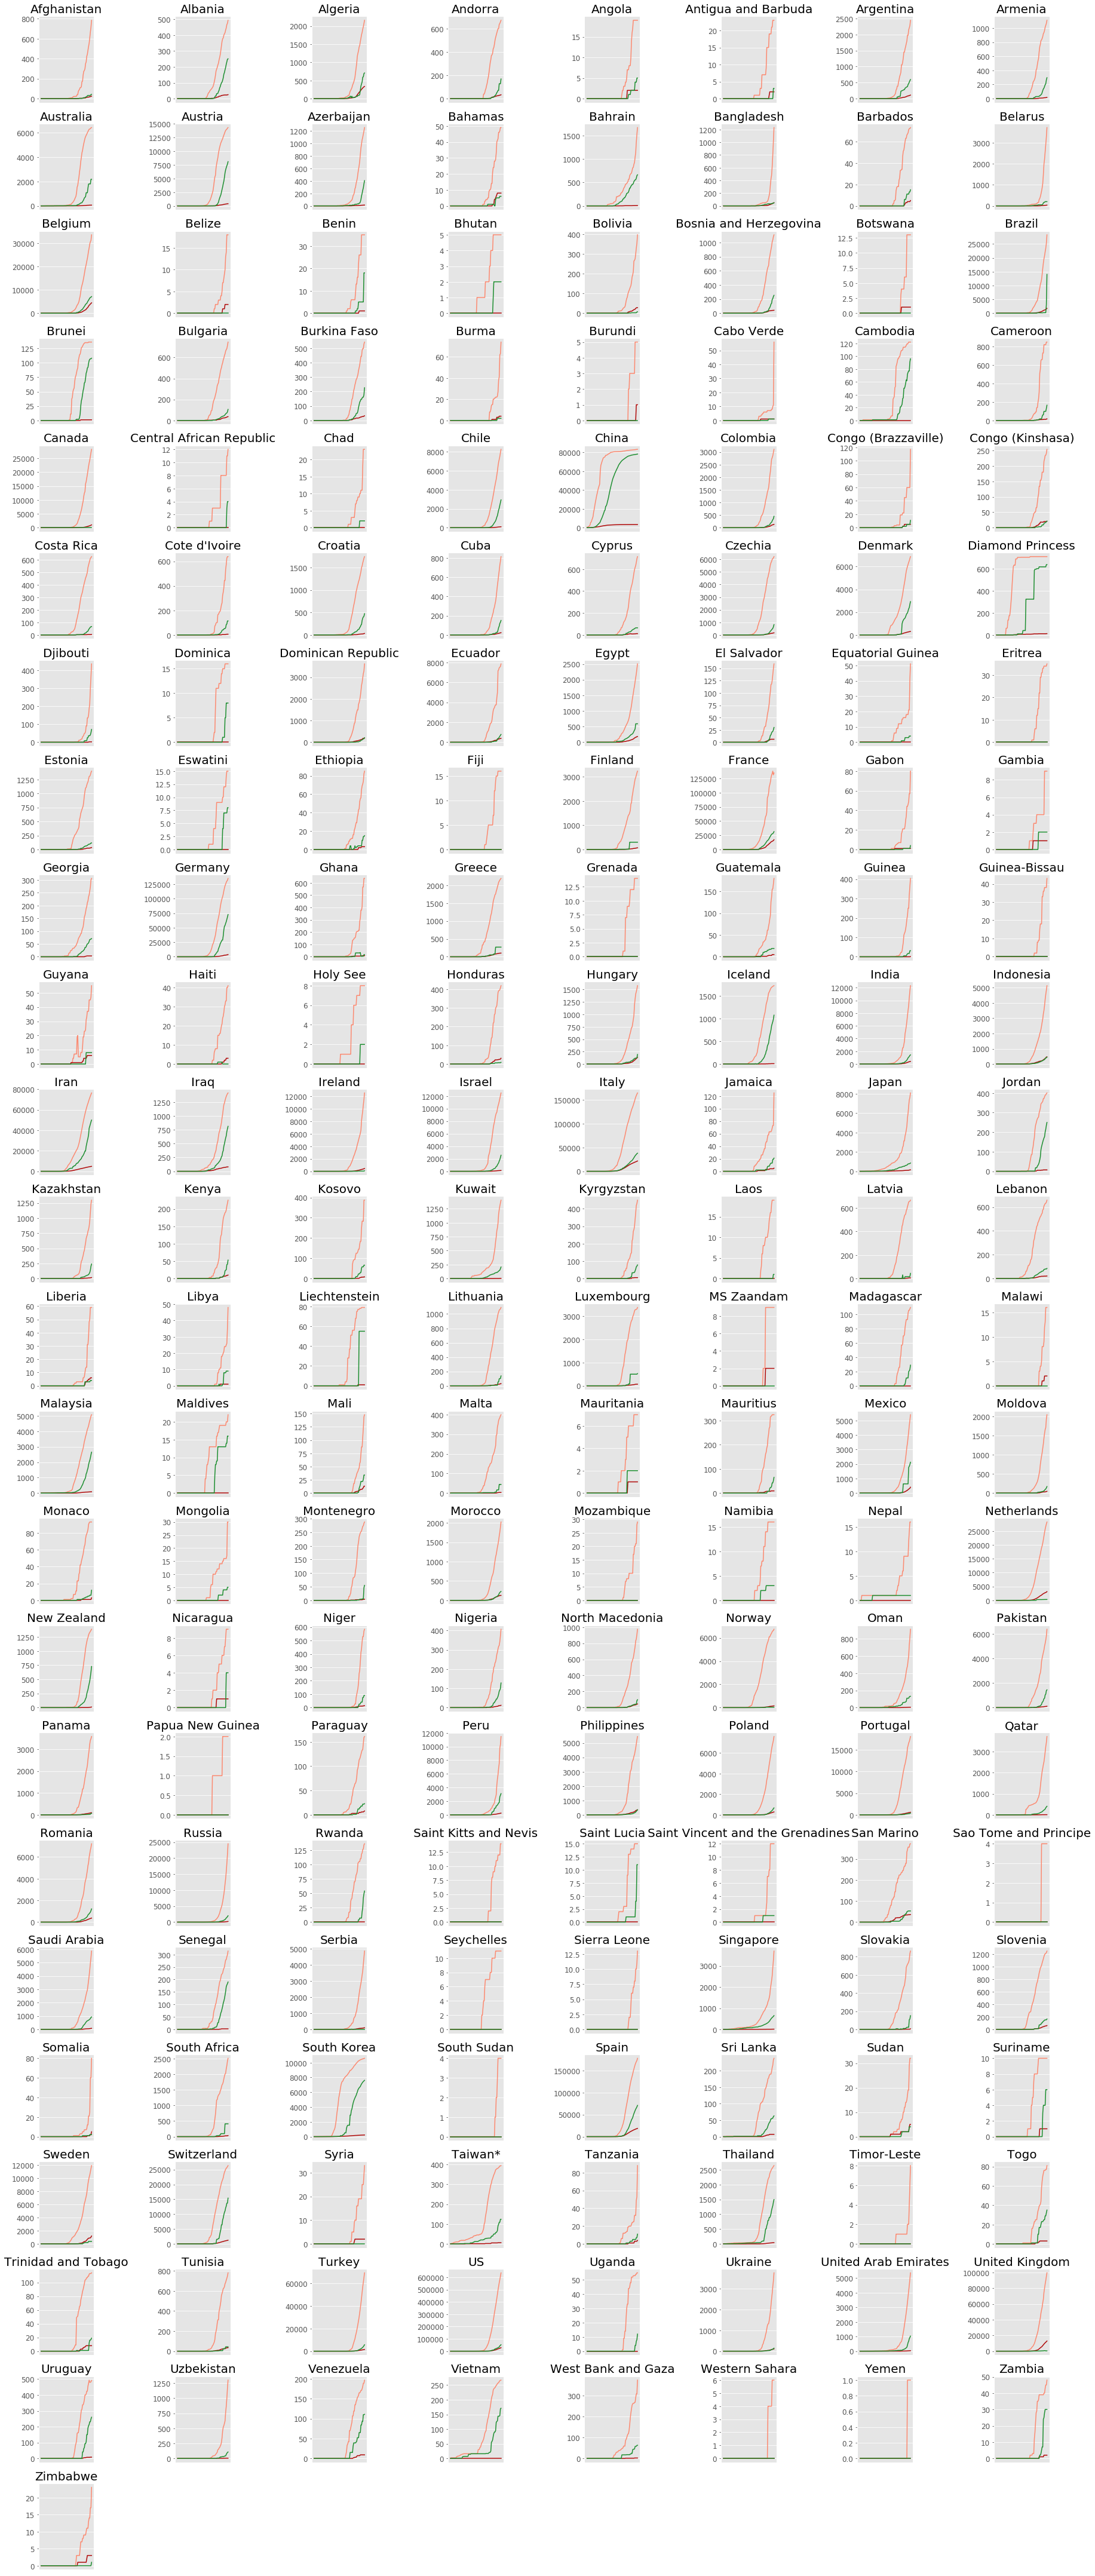

In [95]:
# Plotting COVID19 development for all countries. 
plt.figure(figsize=(25,60))
for i, elem in enumerate(Country_Time_stats['Country'].unique()):
    plt.subplot(24,8,i+1)
    plt.title(elem, fontsize = 20)
    temp_df = Country_Time_stats[Country_Time_stats.Country.isin([elem])]
    
    plt.plot(temp_df['Date'],temp_df['Confirmed'],c="#FC8970")
    plt.plot(temp_df['Date'],temp_df['Deaths'],c='#AF0808')
    plt.plot(temp_df['Date'],temp_df['Recovered'],c='#1D8E30')
    
    plt.yticks(fontsize = 12)
    plt.xticks([])
    plt.xlabel('')
plt.tight_layout()
plt.show()

Now another look of the countrywise mortality rate also shown in the above heatmap. This time is countries with less than 500 confirmes cases removed in order to remove to much data uncertaintency.

/Users/kaspernielsen/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



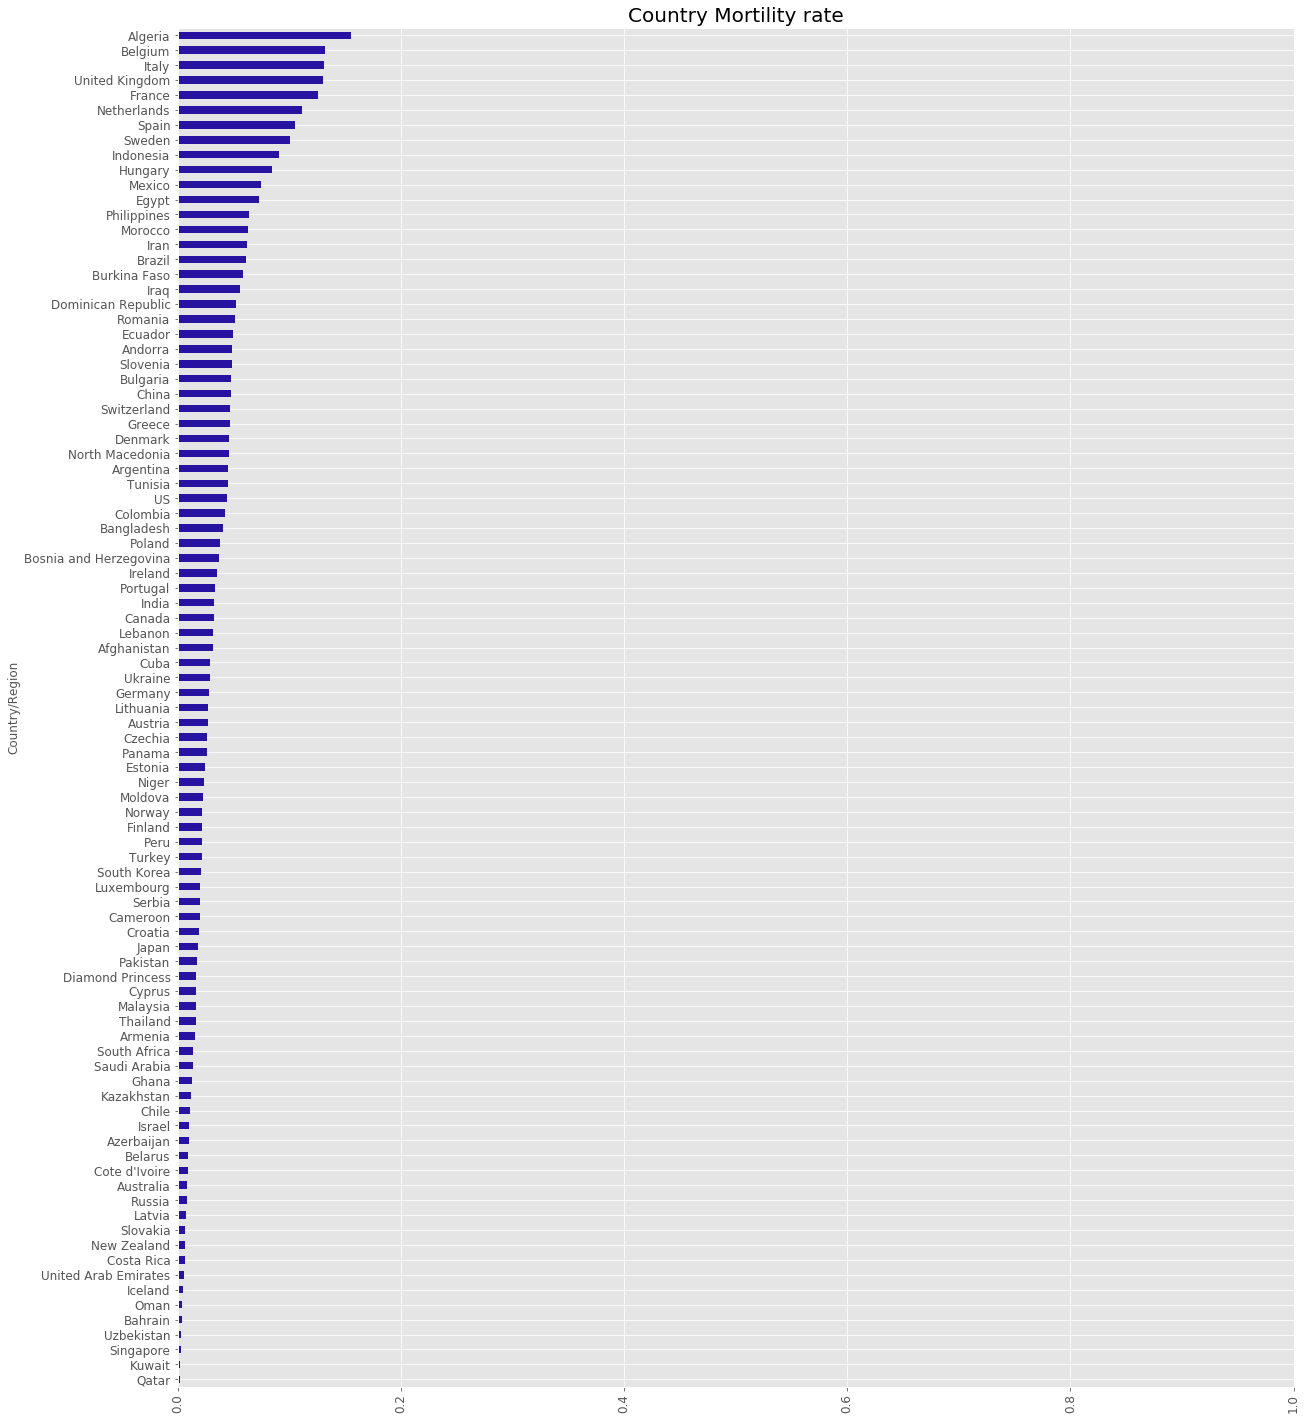

In [135]:
# Looking at mortatility rate per country. 
Country_stats = df_corona[["Confirmed","Deaths","Recovered","Country/Region"]].groupby(["Country/Region"]).max()
# Filtering out all countries with less than 500 cases to remove high data uncertaintency
Country_stats2 = Country_stats[Country_stats["Confirmed"]>=500]
# Adding mortality rate to dataframe
Country_stats2['Mortalityrate'] = Country_stats2['Deaths']/Country_stats2['Confirmed']
# Sorting 
Country_stats2 = Country_stats2.sort_values(by=['Mortalityrate'], ascending=False)

# Plotting the mortality rate per country wtih more than 499 confirmed cases.
plt.figure(figsize=[20,25])
plt.title('Country Mortility rate', fontsize = 20)
Country_stats2['Mortalityrate'].sort_values(ascending=True).plot(kind="barh",color="#2812A1") 
plt.yticks(fontsize = 12)
plt.xticks(fontsize = 12, rotation = 90)
plt.xlim([0,1])
plt.show()

From the bar chart is it obvios that many of the african countries that pop out in the heatmap is romoved since they number of confirmed cases is below the minimum of 500. We also see that the europiaen countryes sadly have a very high mortality rate. It is however still asumed that this is due to lack of testing. 

Below is a chart of the dead count per country. the the heatmap also showed is it US and Europe that tops this list. only countries with above 100 deaths can be seen in the chart. 

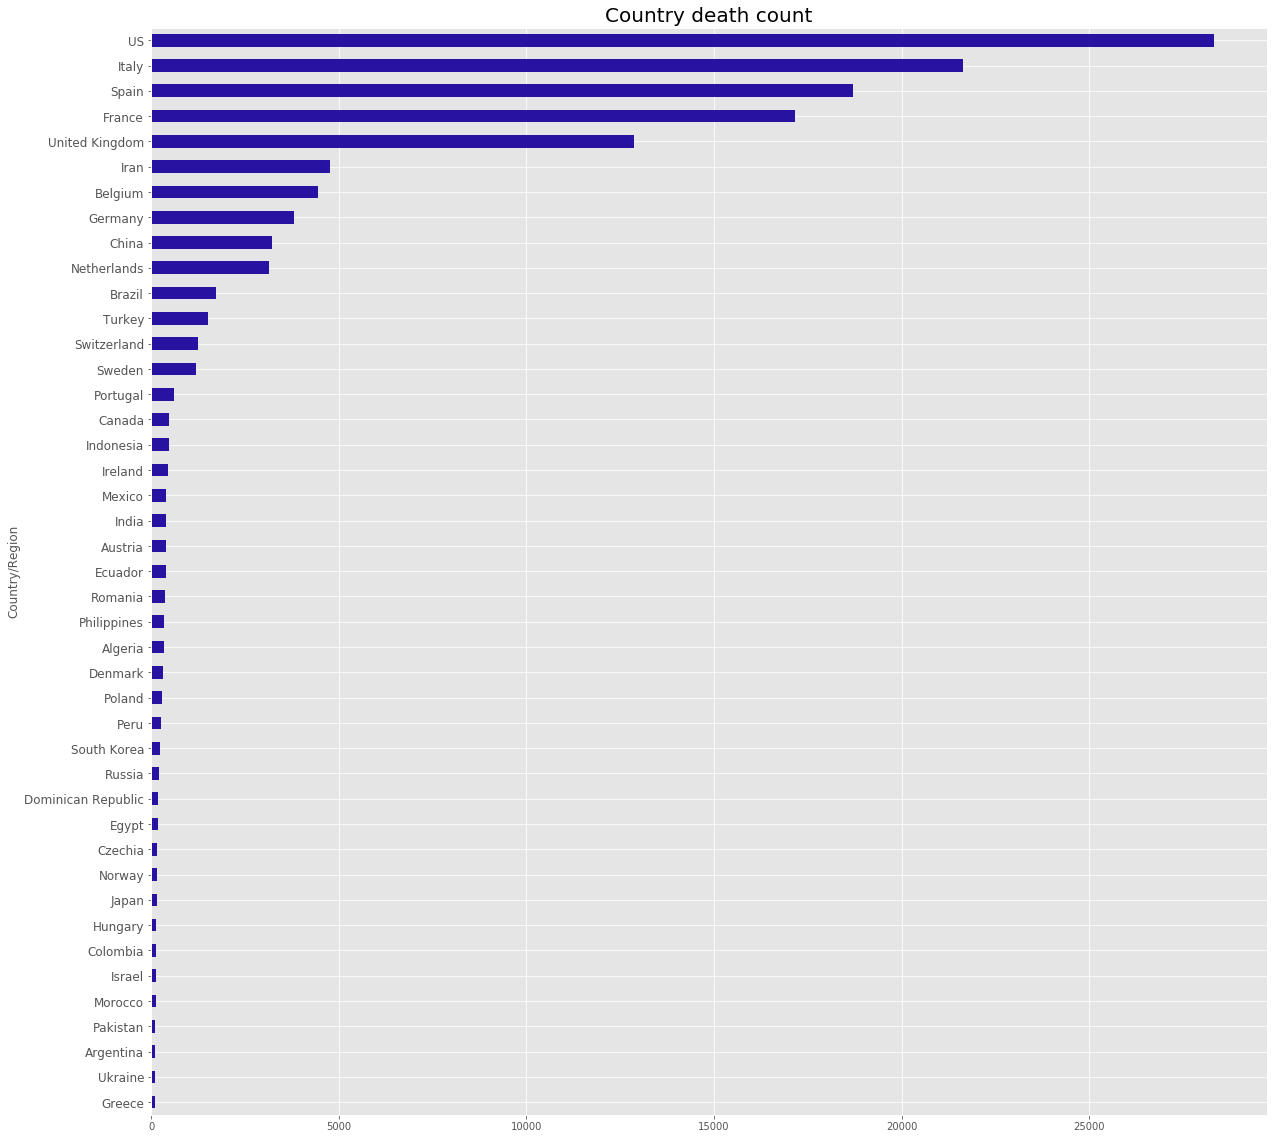

In [136]:
# Death count per country
plt.figure(figsize=[20,20])
plt.title('Country death count', fontsize = 20)
temp = Country_stats[Country_stats['Deaths']>100]
temp['Deaths'].sort_values(ascending=True).plot(kind="barh",color="#2812A1") 
plt.yticks(fontsize = 12)
plt.show()

# Focused Countries

From the analysis above has 24 countries been chosen for futher analysis and forecasting. The countries has been whosen based on number of deaths, while at the same time having a even distribution of countries located around the world. 

In [192]:
# Focused Countries
FocusCountries = ['US', 'Italy', 'Spain', 'France', 'United Kingdom', 'Iran', 'Belgium',
       'Germany', 'China', 'Netherlands', 'Brazil', 'Turkey', 'Switzerland',
       'Sweden', 'Portugal', 'Canada', 'Indonesia', 'Mexico',
       'India', 'Austria', 'Ecuador', 'Algeria','Denmark', 'Philippines']

Three interactive bokeh chart will be made to be able to compare the countries and obtain more detailed information on the the virus has impacted the different countries. 

The three interactive charts are: 

1) Country wise timeline of COVID-19 casualties

2) Logarithmic country wise timeline of COVID-19 casualties

3) Country wise timeline of COVID-19 growth rate

### Country wise timeline of COVID-19 casualties

This chart look at the overall death toll in each of the focused countries since the outbreak stated to be tracked in china at january 22.

In [193]:
# Preparing for dataframe bohek chart.
Focus_Country_Time_stats = Country_Time_stats[Country_Time_stats['Country'].isin(FocusCountries)]
Bohek1 = Focus_Country_Time_stats['Deaths'].unstack().T
# Reseting index
Bohek1 = Bohek1.reset_index()
# Filtering
Bohek1 = pd.DataFrame(data=Bohek1)
# Printing
del Bohek1['Date']
# Reseting index
Bohek1 = Bohek1.reset_index()

In [194]:
# importing necessary packages
from bokeh.io import show, output_notebook
from bokeh.plotting import figure
from bokeh.palettes import viridis
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource, FactorRange, Legend
from bokeh.models.tools import HoverTool

In [195]:
output_notebook()

Loading BokehJS ...

In [196]:
# Importing dataframe as bokeh source
source = ColumnDataSource(Bohek1)

# Defining x axis list
date = source.data['index'].tolist()
date = [ str(x) for x in date ]

# Defining hover configurations
TOOLTIPS = [
    ("Day", "$index"),
    ("Country", "$name"),
    ("Deaths", "@$name"),
]

# Defining figure
p = figure(x_range = FactorRange(factors=date), plot_height=500, plot_width = 1000, title="Country wise timeline of COVID-19 casualties",
           x_axis_label = 'Days since first death in world',y_axis_label = 'Death toll',toolbar_location=None,tooltips=TOOLTIPS)

# Loop to fill figure with information from dataframe
line = {}
items = []
coloring = viridis(len(FocusCountries)) # making list of different colors

# Render glyph
for indx,i in enumerate(FocusCountries):
    line[i] = p.line(x='index',  y=i, source=source,line_width=2, muted_alpha=0.3,muted_line_color=coloring[indx],
                    line_color=coloring[indx], muted=True, name=i)
    items.append((i,[line[i]]))
    
# Adding legends
legend1 = Legend(items=items[0:12],click_policy='mute')
legend2 = Legend(items=items[12:24],click_policy='mute')
p.add_layout(legend1,'left')
p.add_layout(legend2,'left')
# Rotation x-ticks
p.xaxis.major_label_orientation =3.1415/2
# Plotting chart
show(p)

We see hoe the virus deaths exploded suddenly in US. We also see that Philipines that had casualties as one of the forst countries in the world somehow has managed to controle the amount of deaths and thereby the amount of infected. We also see that countries such a Brazil that has a goverment not taking the virus very serious is starting to have a high dayli increase of deaths. 

### Logarithmic country wise timeline of COVID-19 casualties

This chart is looking into how the number of deaths in each of the countries of focus has increased since the first death in the given country happend. 

To show this is a counter of days since the first deaths in each country added to the dataframe

In [200]:
# Making double loop to count days since outbreak got to 1 confirmed people in country
# Empty string
day_count = []
# Outer counter
indx2 = 0
# Loop over focus countries
for i in Focus_Country_Time_stats['Country'].unique():
    # Inner counter
    indx1 = 1
    # Loop over dates
    for d in range(0,len(Focus_Country_Time_stats['Date'].unique())):
        # If statement to only count when confirmed people hits 1 
        if Focus_Country_Time_stats.iloc[d+indx2,1] < 1: 
            day_count.append(0)
        else:
            day_count.append(indx1)
            indx1=indx1+1
            
    indx2=indx2+len(Focus_Country_Time_stats['Date'].unique())

# Adding the Dataframe
Focus_Country_Time_stats['DaysSinceOutbreak'] = day_count

/Users/kaspernielsen/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [201]:
# Preparing dataframe for Bokeh chart.
# Grouping by days since outbreak
Bohek2 = Focus_Country_Time_stats[["Deaths","DaysSinceOutbreak",'Country']].groupby(['Country',"DaysSinceOutbreak"]).sum()
Bohek2 = Bohek2.unstack().T
# Reseting index
Bohek2 = Bohek2.reset_index()
# Filtering
Bohek2 = pd.DataFrame(data=Bohek2)
# Printing
del Bohek2['DaysSinceOutbreak']
del Bohek2['level_0']
# Reseting index
Bohek2 = Bohek2.reset_index()

In [202]:
# Importing dataframe the a bokeh source
source2 = ColumnDataSource(Bohek2)

# Defining x ticks
days = source2.data['index'].tolist()
days = [ str(x) for x in days ]

#defining hover configuration
TOOLTIPS = [
    ("Day", "$index"),
    ("Country", "$name"),
    ("Deaths", "@$name"),
]
# Defining figure
p = figure(x_range = FactorRange(factors=days), plot_height=500, plot_width = 1000, title="Logarithmic Country wise timeline of COVID-19 casualties",
           x_axis_label = 'Days since first death in country',y_axis_label = 'Death toll',toolbar_location=None,y_axis_type="log",tooltips=TOOLTIPS)

# Loop to add information from source
line = {}
items = []
coloring = viridis(len(FocusCountries)) # making list of different colors


#Render glyph
for indx,i in enumerate(FocusCountries):
    line[i] = p.line(x='index',  y=i, source=source2,line_width=2, muted_alpha=0.3,muted_line_color=coloring[indx],
                    line_color=coloring[indx], muted=True, name=i)
    items.append((i,[line[i]]))

#Adding legends    
legend1 = Legend(items=items[0:12],click_policy='mute')
legend2 = Legend(items=items[12:24],click_policy='mute')
p.add_layout(legend1,'left')
p.add_layout(legend2,'left')

# Rotating x-ticks
p.xaxis.major_label_orientation =3.1415/2
# Plotting chart
show(p)

China seems to have flatten the curve. France and US seems to have the steepest curve at the moment. And frace are actually starter to close up un Itaty and Spain in amount deaths. 

### Country wise timeline of COVID-19 growth rate

In order the plot the growth rate it is necessary to do some preprocessing of the dataframe

In [203]:
# Making double loop to count days since outbreak got to 1 confirmed people in country
# Empty string
day_count = []
# Outer counter
indx2 = 0
# Loop over focus countries
for i in Country_Time_stats['Country'].unique():
    # Inner counter
    indx1 = 1
    # Loop over dates
    for d in range(0,len(Country_Time_stats['Date'].unique())):
        # If statement to only count when confirmed people hits 1 
        if Country_Time_stats.iloc[d+indx2,1] < 1: 
            day_count.append(0)
        else:
            day_count.append(indx1)
            indx1=indx1+1
            
    indx2=indx2+len(Country_Time_stats['Date'].unique())

# Adding the Dataframe
Country_Time_stats['DaysSinceOutbreak'] = day_count

#--------------------------------

# Making double loop to calculate growthrate per day for each country
# Empty string
growth_rate = []
# Outer counter
indx2 = 0
# Loop over focus countries
for i in Country_Time_stats['Country'].unique():
    # Inner counter
    indx1 = 1
    # Loop over dates
    for d in range(0,len(Country_Time_stats['Date'].unique())):
        # If statement to correct indexing issue of substrating the last death count of country 1 with first death count of country 2 ect.
        if Country_Time_stats.iloc[d+indx2,1]-Country_Time_stats.iloc[d-1+indx2,1] > 0:
            growth_rate.append((Country_Time_stats.iloc[d+indx2,1]-Country_Time_stats.iloc[d-1+indx2,1])/Country_Time_stats.iloc[d-1+indx2,1])
        else:
            growth_rate.append(0)  
            
    indx2=indx2+len(Country_Time_stats['Date'].unique())

# Adding the Dataframe
Country_Time_stats['GrowthRate'] = growth_rate

Country_Time_stats = Country_Time_stats[Country_Time_stats['DaysSinceOutbreak'] != 0]
Country_Time_stats = Country_Time_stats[Country_Time_stats['DaysSinceOutbreak'] != 1]

/Users/kaspernielsen/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:39: RuntimeWarning:

divide by zero encountered in long_scalars



Before showing the interactive chart is the average growth rate per country shown below. This is a very important mearuse since it tell how fast the virus spred in the different countries. From the avreage plot is is seen that the virus is spreading very fast in Turkey, Brazil and US. 

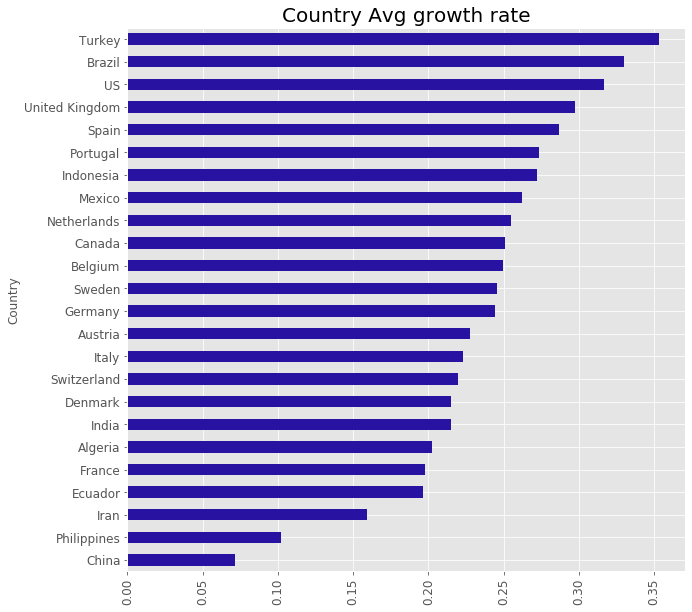

In [204]:
# Grouping mean growth rate pr country.
Country_growth_rate = Country_Time_stats[["GrowthRate","Country"]].groupby(["Country"]).mean()
# filter to only look at focus countries
Country_growth_rate = Country_growth_rate[Country_growth_rate.index.isin(FocusCountries)]

# Plotting the growth rate per FOCUS country.
plt.figure(figsize=[10,10])
plt.title('Country Avg growth rate', fontsize = 20)
Country_growth_rate.GrowthRate.sort_values(ascending=True).plot(kind="barh",color="#2812A1") 
plt.yticks(fontsize = 12)
plt.xticks(fontsize = 12, rotation = 90)
plt.show()

In [205]:
Focus_Country_Time_stats = Country_Time_stats[Country_Time_stats.Country.isin(FocusCountries)]

In [206]:
# Preparing dataframe for bohek chart
#Grouping by days since outbreak
Bohek3 = Focus_Country_Time_stats[["GrowthRate","DaysSinceOutbreak",'Country']].groupby(['Country',"DaysSinceOutbreak"]).sum()
Bohek3 = Bohek3.unstack().T
# Reseting index
Bohek3 = Bohek3.reset_index()
# Filtering
Bohek3 = pd.DataFrame(data=Bohek3)
# Printing
del Bohek3['DaysSinceOutbreak']
del Bohek3['level_0']
# Reseting index
Bohek3 = Bohek3.reset_index()
Bohek3 = Bohek3.drop([0, 1])

In [207]:
# Importing source
source3 = ColumnDataSource(Bohek3)

# Defining x axis ticks
days = source3.data['index'].tolist()
days = [ str(x) for x in days ]

# Defining hover tool
TOOLTIPS = [
    ("Day", "$index"),
    ("Country", "$name"),
    ("Growth rate", "@$name"),
]
# Defining Figure
p = figure(x_range = FactorRange(factors=days), plot_height=500, plot_width = 1000, title="Country wise timeline of COVID-19 growth rate",
           x_axis_label = 'Days since first death in world',y_axis_label = 'Growth rate',toolbar_location=None,tooltips=TOOLTIPS)


# Defining loop to import dataframe information to tool.
line = {}
items = []
coloring = viridis(len(FocusCountries)) # making list of different colors


# Render glyph
for indx,i in enumerate(FocusCountries):
    line[i] = p.line(x='index',  y=i, source=source3,line_width=2, muted_alpha=0.3,muted_line_color=coloring[indx],
                    line_color=coloring[indx], muted=True, name=i)
    items.append((i,[line[i]]))

    
# Adding legend
legend1 = Legend(items=items[0:12],click_policy='mute')
legend2 = Legend(items=items[12:24],click_policy='mute')
p.add_layout(legend1,'left')
p.add_layout(legend2,'left')

# Rotating X ticks
p.xaxis.major_label_orientation =3.1415/2
# Showing figure
show(p)

We see that the growth rate become smaller and smaller - Together with information from death distribution in china seen in bokeh plot 1 it looks to follow a sigmoid distribution more than a exponential distribution. 

### Forecasting future deaths for focused countries

To be able to forecast the death of the focused countries is a Machine learning algorithm made. 

The model will use both corona related features and demographic features to make the prediction for the next four days. The model is first trained on all past data and then tested with the date for all countries from 5 days ago in order to compare the predictions with the actual observed number of deaths for the four forecasted days. 

When a model is concluded to perform well enough is it used on the data from today in order to predict four days ahead of time. These predictions will be shown in a interactive bokeh chart. 

First is a lot of preprocessing done in order to obtain the wanted corona related feature for the prediction model

In [208]:
# Reseting index and change inf growthrate to 1
Country_Time_stats = Country_Time_stats.reset_index(drop=True)
Country_Time_stats = Country_Time_stats.replace([np.inf, -np.inf], 1)

In [209]:
# Making column with number of deaths happened today.
# Empty string
death_lag0 = []
for i in range(0,len(Country_Time_stats['Country'])):
    if Country_Time_stats.iloc[i,5] == 2:
        death_lag0.append(Country_Time_stats.iloc[i,1])
    else:
        death_lag0.append(Country_Time_stats.iloc[i,1]-Country_Time_stats.iloc[i-1,1]) 
Country_Time_stats['death_lag0'] = death_lag0

In [210]:
#making lags to show the number of deaths for each of the last 4 days
Country_Time_stats['death_lag1'] = Country_Time_stats['death_lag0'].shift(1)
Country_Time_stats['death_lag2'] = Country_Time_stats['death_lag0'].shift(2)
Country_Time_stats['death_lag3'] = Country_Time_stats['death_lag0'].shift(3)
Country_Time_stats['death_lag4'] = Country_Time_stats['death_lag0'].shift(4)

# Correcting overlap between countries when using lags. 
# Correcting lag 1
Country_Time_stats.loc[Country_Time_stats['DaysSinceOutbreak'] == 2, 'death_lag1'] = 0 
# Correcting lag 2
Country_Time_stats.loc[Country_Time_stats['DaysSinceOutbreak'] == 2, 'death_lag2'] = 0 
Country_Time_stats.loc[Country_Time_stats['DaysSinceOutbreak'] == 3, 'death_lag2'] = 0 
# Correcting lag 3
Country_Time_stats.loc[Country_Time_stats['DaysSinceOutbreak'] == 2, 'death_lag3'] = 0 
Country_Time_stats.loc[Country_Time_stats['DaysSinceOutbreak'] == 3, 'death_lag3'] = 0 
Country_Time_stats.loc[Country_Time_stats['DaysSinceOutbreak'] == 4, 'death_lag3'] = 0 
# Correcting lag 4
Country_Time_stats.loc[Country_Time_stats['DaysSinceOutbreak'] == 2, 'death_lag4'] = 0 
Country_Time_stats.loc[Country_Time_stats['DaysSinceOutbreak'] == 3, 'death_lag4'] = 0 
Country_Time_stats.loc[Country_Time_stats['DaysSinceOutbreak'] == 4, 'death_lag4'] = 0 
Country_Time_stats.loc[Country_Time_stats['DaysSinceOutbreak'] == 5, 'death_lag4'] = 0 
Country_Time_stats.head()

Confirmed  Deaths  Recovered      Country       Date  DaysSinceOutbreak  \
0         40       1          1  Afghanistan 2020-03-23                  2   
1         74       1          1  Afghanistan 2020-03-24                  3   
2         84       2          2  Afghanistan 2020-03-25                  4   
3         94       4          2  Afghanistan 2020-03-26                  5   
4        110       4          2  Afghanistan 2020-03-27                  6   

   GrowthRate  death_lag0  death_lag1  death_lag2  death_lag3  death_lag4  
0         0.0           1         0.0         0.0         0.0         0.0  
1         0.0           0         1.0         0.0         0.0         0.0  
2         1.0           1         0.0         1.0         0.0         0.0  
3         1.0           2         1.0         0.0         1.0         0.0  
4         0.0           0         2.0         1.0         0.0         1.0

In [211]:
# Creating target prediction variables for for next 4 days.
#making reverse lags to show the number of deaths for each of the next 4 days 
Country_Time_stats['death_future1'] = Country_Time_stats['Deaths'].shift(-1)
Country_Time_stats['death_future2'] = Country_Time_stats['Deaths'].shift(-2)
Country_Time_stats['death_future3'] = Country_Time_stats['Deaths'].shift(-3)
Country_Time_stats['death_future4'] = Country_Time_stats['Deaths'].shift(-4)

# creating key rows to shows which rows to be deleted due to country overlap
Country_Time_stats['delete_check1'] = Country_Time_stats['DaysSinceOutbreak'].shift(-1)
Country_Time_stats['delete_check2'] = Country_Time_stats['DaysSinceOutbreak'].shift(-2)
Country_Time_stats['delete_check3'] = Country_Time_stats['DaysSinceOutbreak'].shift(-3)
Country_Time_stats['delete_check4'] = Country_Time_stats['DaysSinceOutbreak'].shift(-4)

# have to delete all the rows before the row containing day 2 since they are messed up
# making new copy of data with new name in order to be able to compare predicted and actual values later. 
Country_Time_stats_ML = Country_Time_stats[Country_Time_stats.delete_check1 != 2]
Country_Time_stats_ML = Country_Time_stats_ML[Country_Time_stats_ML.delete_check2 != 2]
Country_Time_stats_ML = Country_Time_stats_ML[Country_Time_stats_ML.delete_check3 != 2]
Country_Time_stats_ML = Country_Time_stats_ML[Country_Time_stats_ML.delete_check4 != 2]

In [212]:
# Only using last observation for each country as test - the rest is training data. 
# making another key in order to know which rows should become test rows 
Country_Time_stats_ML['traintestsplitkey'] = Country_Time_stats_ML['DaysSinceOutbreak'].shift(-1)
Country_Time_stats_ML.head()

Confirmed  Deaths  Recovered      Country       Date  DaysSinceOutbreak  \
0         40       1          1  Afghanistan 2020-03-23                  2   
1         74       1          1  Afghanistan 2020-03-24                  3   
2         84       2          2  Afghanistan 2020-03-25                  4   
3         94       4          2  Afghanistan 2020-03-26                  5   
4        110       4          2  Afghanistan 2020-03-27                  6   

   GrowthRate  death_lag0  death_lag1  death_lag2  ...  death_lag4  \
0         0.0           1         0.0         0.0  ...         0.0   
1         0.0           0         1.0         0.0  ...         0.0   
2         1.0           1         0.0         1.0  ...         0.0   
3         1.0           2         1.0         0.0  ...         0.0   
4         0.0           0         2.0         1.0  ...         1.0   

   death_future1  death_future2  death_future3  death_future4  delete_check1  \
0            1.0            2.0            4.0            4.0            3.0   
1            2.0            4.0            4.0            4.0            4.0   
2            4.0            4.0            4.0            4.0            5.0   
3            4.0            4.0            4.0            4.0            6.0   
4            4.0            4.0            4.0            4.0            7.0   

   delete_check2  delete_check3  delete_check4  traintestsplitkey  
0            4.0            5.0            6.0                3.0  
1            5.0            6.0            7.0                4.0  
2            6.0            7.0            8.0                5.0  
3            7.0            8.0            9.0                6.0  
4            8.0            9.0           10.0                7.0  

[5 rows x 21 columns]

Now is the enriched data with demographic information added the the current dataframe with the current features.

In [213]:
#inserting enriched data 
df_enriched = pd.read_csv('./Data/enriched_covid_19_week_2.csv')
# splitting country_state column into two to be able to merch with corona data
df_enriched[['Country','Region']] = df_enriched.Country_Region.str.split("_",expand=True)

df_enriched = df_enriched.drop(columns=['Id','ConfirmedCases',
       'Fatalities','restrictions', 'quarantine', 'schools','Province_State', 'Date','Country_Region','Region'])
df_enriched.columns

Index(['age_0-4', 'age_5-9', 'age_10-14', 'age_15-19', 'age_20-24',
       'age_25-29', 'age_30-34', 'age_35-39', 'age_40-44', 'age_45-49',
       'age_50-54', 'age_55-59', 'age_60-64', 'age_65-69', 'age_70-74',
       'age_75-79', 'age_80-84', 'age_85-89', 'age_90-94', 'age_95-99',
       'age_100+', 'total_pop', 'smokers_perc', 'density', 'urbanpop',
       'hospibed', 'lung', 'femalelung', 'malelung', 'Country'],
      dtype='object')

In [214]:
df_enriched = df_enriched.groupby(['Country']).mean()
df_enriched

age_0-4   age_5-9  age_10-14  age_15-19  age_20-24  age_25-29  \
Country                                                                       
Afghanistan  0.145717  0.139133   0.133376   0.118922   0.100864   0.079875   
Albania      0.057780  0.058223   0.056356   0.069357   0.079351   0.084899   
Algeria      0.114969  0.105721   0.087145   0.066369   0.068410   0.081500   
Andorra      0.091752  0.093138   0.079824   0.072232   0.077824   0.081867   
Angola       0.176321  0.155301   0.132332   0.107482   0.087706   0.073737   
...               ...       ...        ...        ...        ...        ...   
Uzbekistan   0.102531  0.098063   0.087406   0.075754   0.083131   0.094554   
Venezuela    0.083113  0.096047   0.093466   0.087944   0.073907   0.071343   
Vietnam      0.081083  0.077935   0.072923   0.066786   0.070067   0.088036   
Zambia       0.160273  0.147797   0.132104   0.115404   0.095025   0.077973   
Zimbabwe     0.141119  0.148740   0.129252   0.110267   0.092702   0.074357   

             age_30-34  age_35-39  age_40-44  age_45-49  ...  age_95-99  \
Country                                                  ...              
Afghanistan   0.063662   0.052825   0.042610   0.033516  ...   0.000016   
Albania       0.077811   0.057978   0.052995   0.059250  ...   0.000270   
Algeria       0.085009   0.080899   0.068733   0.055520  ...   0.000201   
Andorra       0.084987   0.074887   0.066841   0.063835  ...   0.000213   
Angola        0.062093   0.050476   0.040488   0.032923  ...   0.000015   
...                ...        ...        ...        ...  ...        ...   
Uzbekistan    0.090543   0.076094   0.062906   0.054531  ...   0.000111   
Venezuela     0.072596   0.069053   0.065682   0.059687  ...   0.000523   
Vietnam       0.086677   0.079762   0.072261   0.067179  ...   0.001009   
Zambia        0.064919   0.053945   0.043964   0.032945  ...   0.000007   
Zimbabwe      0.066937   0.058710   0.049622   0.035006  ...   0.000018   

                 age_100+  total_pop  smokers_perc  density  urbanpop  \
Country                                                                 
Afghanistan  1.001841e-06  38928.341     21.389448     60.0      25.0   
Albania      1.772187e-05   2877.800     28.700000    105.0      63.0   
Algeria      2.196071e-05  43851.043     15.600000     18.0      73.0   
Andorra      1.937138e-05   9240.438     33.500000    164.0      88.0   
Angola       1.156201e-06  32866.268     21.389448     95.0      67.0   
...                   ...        ...           ...      ...       ...   
Uzbekistan   1.431167e-05  33469.199     12.600000     79.0      50.0   
Venezuela    1.012099e-04  28435.943     21.389448     32.0      80.0   
Vietnam      2.450210e-04  97338.583     22.800000    314.0      38.0   
Zambia       2.719763e-07  18383.956     13.800000     25.0      45.0   
Zimbabwe     1.278348e-06  14862.927     15.800000     95.0      67.0   

             hospibed   lung  femalelung  malelung  
Country                                             
Afghanistan       0.5  37.62      36.310     39.33  
Albania           2.9  11.67       7.020     17.04  
Algeria           1.9   8.77       5.030     12.81  
Andorra           2.5  20.61      16.065     26.70  
Angola            2.7  20.61      16.065     26.70  
...               ...    ...         ...       ...  
Uzbekistan        4.0  10.42       7.990     13.64  
Venezuela         0.8  22.34      18.580     27.11  
Vietnam           2.6  26.26      16.800     41.72  
Zambia            2.0  20.04      15.200     26.16  
Zimbabwe          2.7  20.61      16.065     26.70  

[173 rows x 29 columns]

In [215]:
# merging enriched data to corona data
Country_Time_stats_ML = Country_Time_stats_ML.merge(df_enriched, left_on=Country_Time_stats_ML['Country'], right_on=df_enriched.index)
del Country_Time_stats_ML['key_0']

In [216]:
Country_Time_stats_ML.columns

Index(['Confirmed', 'Deaths', 'Recovered', 'Country', 'Date',
       'DaysSinceOutbreak', 'GrowthRate', 'death_lag0', 'death_lag1',
       'death_lag2', 'death_lag3', 'death_lag4', 'death_future1',
       'death_future2', 'death_future3', 'death_future4', 'delete_check1',
       'delete_check2', 'delete_check3', 'delete_check4', 'traintestsplitkey',
       'age_0-4', 'age_5-9', 'age_10-14', 'age_15-19', 'age_20-24',
       'age_25-29', 'age_30-34', 'age_35-39', 'age_40-44', 'age_45-49',
       'age_50-54', 'age_55-59', 'age_60-64', 'age_65-69', 'age_70-74',
       'age_75-79', 'age_80-84', 'age_85-89', 'age_90-94', 'age_95-99',
       'age_100+', 'total_pop', 'smokers_perc', 'density', 'urbanpop',
       'hospibed', 'lung', 'femalelung', 'malelung'],
      dtype='object')

In [217]:
# Preprocessing of data
Country_Time_stats_ML = Country_Time_stats_ML.dropna() #

Features = ['Deaths','DaysSinceOutbreak', 'GrowthRate','death_lag0', 'death_lag1',
       'death_lag2', 'death_lag3', 'death_lag4','age_0-4', 'age_5-9', 'age_10-14', 'age_15-19', 'age_20-24',
       'age_25-29', 'age_30-34', 'age_35-39', 'age_40-44', 'age_45-49',
       'age_50-54', 'age_55-59', 'age_60-64', 'age_65-69', 'age_70-74',
       'age_75-79', 'age_80-84', 'age_85-89', 'age_90-94', 'age_95-99',
       'age_100+', 'total_pop', 'smokers_perc', 'density', 'urbanpop',
       'hospibed']
Target = ['death_future1','death_future2','death_future3','death_future4']

Train = Country_Time_stats_ML[Country_Time_stats_ML.traintestsplitkey != 2]
Test = Country_Time_stats_ML[Country_Time_stats_ML.traintestsplitkey == 2]

X_train  = Train.loc[:, Features].values
y_train = Train.loc[:,Target].values
X_test  = Test.loc[:, Features].values
y_test = Test.loc[:,Target].values

from sklearn.preprocessing import StandardScaler
Sc = StandardScaler()
#Important only to fit to the train data!
X_train = Sc.fit_transform(X_train)
X_test = Sc.transform(X_test)

In [238]:
#linear regression - base for forcast in order to evaluate ANN
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold

#fitting and predicting with linear model
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)
y_pred1 = lin_model.predict(X_test)

#calculating errors
print('Mean Squared Error: ',mean_squared_error(y_test, y_pred1))
print('Mean Absolute Error: ',mean_absolute_error(y_test, y_pred1))
print()

#cross validating 
kf = KFold(n_splits=10) #10 fold cross validation
y_pred_c1 = cross_val_predict(lin_model, X_test, y_test, cv=kf)
print('Cross validated Mean Squared Error: ',mean_squared_error(y_test, y_pred_c1))
print('Cross validated Mean Absolute Error: ',mean_absolute_error(y_test, y_pred_c1))

Mean Squared Error:  22474.260003391857
Mean Absolute Error:  44.91429659361579

Cross validated Mean Squared Error:  40731.05568464196
Cross validated Mean Absolute Error:  43.023446716152534


In [239]:
#Ridge
from sklearn import linear_model
reg = linear_model.Ridge(alpha=.5)
reg.fit(X_train, y_train)
y_pred1 = reg.predict(X_test)
#calculating errors
print('Mean Squared Error: ',mean_squared_error(y_test, y_pred2))
print('Mean Absolute Error: ',mean_absolute_error(y_test, y_pred2))
print()

#cross validating 
kf = KFold(n_splits=10) #10 fold cross validation
y_pred_c1 = cross_val_predict(reg, X_test, y_test, cv=kf)
print('Cross validated Mean Squared Error: ',mean_squared_error(y_test, y_pred_c1))
print('Cross validated Mean Absolute Error: ',mean_absolute_error(y_test, y_pred_c1))


Mean Squared Error:  22103.2403702878
Mean Absolute Error:  45.40458457473653

Cross validated Mean Squared Error:  27908.029465194217
Cross validated Mean Absolute Error:  44.47663413641916


In [240]:
#Lasso
reg = linear_model.Lasso(alpha=0.1)
reg.fit(X_train, y_train)
y_pred1 = reg.predict(X_test)
#calculating errors
print('Mean Squared Error: ',mean_squared_error(y_test, y_pred2))
print('Mean Absolute Error: ',mean_absolute_error(y_test, y_pred2))
print()

#cross validating 
kf = KFold(n_splits=10) #10 fold cross validation
y_pred_c1 = cross_val_predict(reg, X_test, y_test, cv=kf)
print('Cross validated Mean Squared Error: ',mean_squared_error(y_test, y_pred_c1))
print('Cross validated Mean Absolute Error: ',mean_absolute_error(y_test, y_pred_c1))


Mean Squared Error:  22103.2403702878
Mean Absolute Error:  45.40458457473653

Cross validated Mean Squared Error:  12820.41295029306
Cross validated Mean Absolute Error:  32.8755778854901


In [242]:
#LassoLars - best estimator
reg = linear_model.LassoLars(alpha=0.1)
reg.fit(X_train, y_train)
y_pred1 = reg.predict(X_test)
#calculating errors
print('Mean Squared Error: ',mean_squared_error(y_test, y_pred2))
print('Mean Absolute Error: ',mean_absolute_error(y_test, y_pred2))
print()

#cross validating 
kf = KFold(n_splits=10) #10 fold cross validation
y_pred_c1 = cross_val_predict(reg, X_test, y_test, cv=kf)
print('Cross validated Mean Squared Error: ',mean_squared_error(y_test, y_pred_c1))
print('Cross validated Mean Absolute Error: ',mean_absolute_error(y_test, y_pred_c1))


Mean Squared Error:  22103.2403702878
Mean Absolute Error:  45.40458457473653

Cross validated Mean Squared Error:  10278.44275179459
Cross validated Mean Absolute Error:  25.130993750433525


In [243]:
#Adding predictions to test dataframe
Test['forecast1'] = y_pred1[:,0]
Test['forecast2'] = y_pred1[:,1]
Test['forecast3'] = y_pred1[:,2]
Test['forecast4'] = y_pred1[:,3]

In [244]:
# Deleting unnecessary coulmns from tast dataframe
Test = Test.drop(columns=['Confirmed', 'Recovered',
       'DaysSinceOutbreak', 'GrowthRate', 'death_lag0', 'death_lag1',
       'death_lag2', 'death_lag3', 'death_lag4', 'death_future1',
       'death_future2', 'death_future3', 'death_future4', 'delete_check1',
       'delete_check2', 'delete_check3', 'delete_check4', 'traintestsplitkey','Deaths','Date',
        'age_0-4', 'age_5-9', 'age_10-14', 'age_15-19', 'age_20-24',
       'age_25-29', 'age_30-34', 'age_35-39', 'age_40-44', 'age_45-49',
       'age_50-54', 'age_55-59', 'age_60-64', 'age_65-69', 'age_70-74',
       'age_75-79', 'age_80-84', 'age_85-89', 'age_90-94', 'age_95-99',
       'age_100+', 'total_pop', 'smokers_perc', 'density', 'urbanpop',
       'hospibed','lung', 'femalelung', 'malelung'])

KeyError: "['Confirmed' 'Recovered' 'DaysSinceOutbreak' 'GrowthRate' 'death_lag0'\n 'death_lag1' 'death_lag2' 'death_lag3' 'death_lag4' 'death_future1'\n 'death_future2' 'death_future3' 'death_future4' 'delete_check1'\n 'delete_check2' 'delete_check3' 'delete_check4' 'traintestsplitkey'\n 'Deaths' 'Date' 'age_0-4' 'age_5-9' 'age_10-14' 'age_15-19' 'age_20-24'\n 'age_25-29' 'age_30-34' 'age_35-39' 'age_40-44' 'age_45-49' 'age_50-54'\n 'age_55-59' 'age_60-64' 'age_65-69' 'age_70-74' 'age_75-79' 'age_80-84'\n 'age_85-89' 'age_90-94' 'age_95-99' 'age_100+' 'total_pop' 'smokers_perc'\n 'density' 'urbanpop' 'hospibed' 'lung' 'femalelung' 'malelung'] not found in axis"

In [245]:
# Predicted values
prediction_values = Test.set_index('Country')
prediction_values = prediction_values.T
prediction_values

Country    Afghanistan    Albania     Algeria    Andorra    Angola  \
forecast1    23.888817  26.912571  301.639461  30.408918  5.773892   
forecast2    30.547882  35.144374  331.740676  35.198165  7.727228   
forecast3    36.149368  43.106375  362.164449  38.304474  6.851771   
forecast4    41.671616  50.393915  394.135876  42.117142  3.360088   

Country    Antigua and Barbuda   Argentina    Armenia   Australia     Austria  \
forecast1             5.773892   93.033263  17.889715   63.582454  361.666426   
forecast2             4.573862  109.611943  22.407565   80.622797  392.603478   
forecast3             0.739991  128.798468  25.565862  105.935848  430.108718   
forecast4            -5.313002  144.389012  29.193126  139.743345  465.583174   

Country    ...    Tunisia       Turkey            US     Ukraine  \
forecast1  ...  33.223398  1201.924605  22536.664750   83.917587   
forecast2  ...  40.257639  1308.254247  24703.886837  100.485922   
forecast3  ...  46.583138  1412.538769  26917.694090  117.567303   
forecast4  ...  55.471534  1519.605372  29050.513817  124.680796   

Country    United Arab Emirates  United Kingdom    Uruguay  Uzbekistan  \
forecast1             26.668164    10858.135534  10.933473    8.205063   
forecast2             34.718626    11867.468940  16.020335   11.519808   
forecast3             40.694417    12876.761991  30.620442   12.652568   
forecast4             51.005192    13926.367670  55.094755    8.902927   

Country    Venezuela    Zambia  
forecast1  12.652702  6.066074  
forecast2  15.787005  6.827577  
forecast3  18.837337  3.944993  
forecast4  29.730139 -0.669513  

[4 rows x 142 columns]

In [246]:
# Values before prediction starts
Country_Time_stats_ML
pre_prediction_values = Country_Time_stats_ML[["Country","Deaths","Date"]].groupby(["Date","Country"]).sum().unstack()
pre_prediction_values = pd.DataFrame(data=pre_prediction_values)
pre_prediction_values = pre_prediction_values['Deaths']
# Dropping simbawe to match frames
pre_prediction_values = pre_prediction_values.drop(columns=['Zimbabwe'])
pre_prediction_values

Country     Afghanistan  Albania  Algeria  Andorra  Angola  \
Date                                                         
2020-01-23          NaN      NaN      NaN      NaN     NaN   
2020-01-24          NaN      NaN      NaN      NaN     NaN   
2020-01-25          NaN      NaN      NaN      NaN     NaN   
2020-01-26          NaN      NaN      NaN      NaN     NaN   
2020-01-27          NaN      NaN      NaN      NaN     NaN   
...                 ...      ...      ...      ...     ...   
2020-04-07         14.0     22.0    193.0     22.0     2.0   
2020-04-08         14.0     22.0    205.0     23.0     2.0   
2020-04-09         15.0     23.0    235.0     25.0     2.0   
2020-04-10         15.0     23.0    256.0     26.0     2.0   
2020-04-11         18.0     23.0    275.0     26.0     2.0   

Country     Antigua and Barbuda  Argentina  Armenia  Australia  Austria  ...  \
Date                                                                     ...   
2020-01-23                  NaN        NaN      NaN        NaN      NaN  ...   
2020-01-24                  NaN        NaN      NaN        NaN      NaN  ...   
2020-01-25                  NaN        NaN      NaN        NaN      NaN  ...   
2020-01-26                  NaN        NaN      NaN        NaN      NaN  ...   
2020-01-27                  NaN        NaN      NaN        NaN      NaN  ...   
...                         ...        ...      ...        ...      ...  ...   
2020-04-07                  NaN       56.0      8.0       45.0    243.0  ...   
2020-04-08                  2.0       63.0      9.0       50.0    273.0  ...   
2020-04-09                  2.0       72.0     10.0       51.0    295.0  ...   
2020-04-10                  2.0       82.0     12.0       54.0    319.0  ...   
2020-04-11                  2.0       83.0     13.0       57.0    337.0  ...   

Country     Tunisia  Turkey       US  Ukraine  United Arab Emirates  \
Date                                                                  
2020-01-23      NaN     NaN      NaN      NaN                   NaN   
2020-01-24      NaN     NaN      NaN      NaN                   NaN   
2020-01-25      NaN     NaN      NaN      NaN                   NaN   
2020-01-26      NaN     NaN      NaN      NaN                   NaN   
2020-01-27      NaN     NaN      NaN      NaN                   NaN   
...             ...     ...      ...      ...                   ...   
2020-04-07     23.0   725.0  12722.0     45.0                  12.0   
2020-04-08     24.0   812.0  14695.0     52.0                  12.0   
2020-04-09     25.0   908.0  16478.0     57.0                  14.0   
2020-04-10     25.0  1006.0  18586.0     69.0                  16.0   
2020-04-11     28.0  1101.0  20463.0     73.0                  20.0   

Country     United Kingdom  Uruguay  Uzbekistan  Venezuela  Zambia  
Date                                                                
2020-01-23             NaN      NaN         NaN        NaN     NaN  
2020-01-24             NaN      NaN         NaN        NaN     NaN  
2020-01-25             NaN      NaN         NaN        NaN     NaN  
2020-01-26             NaN      NaN         NaN        NaN     NaN  
2020-01-27             NaN      NaN         NaN        NaN     NaN  
...                    ...      ...         ...        ...     ...  
2020-04-07          6171.0      7.0         2.0        7.0     1.0  
2020-04-08          7111.0      7.0         3.0        9.0     1.0  
2020-04-09          7993.0      7.0         3.0        9.0     1.0  
2020-04-10          8974.0      7.0         3.0        9.0     2.0  
2020-04-11          9892.0      7.0         4.0        9.0     2.0  

[80 rows x 142 columns]

In [247]:
# Dataframe with predictions for plotting. - merging pre prediction values with prediction values
Prediction = pd.concat([pre_prediction_values,prediction_values], ignore_index=True)

In [248]:
# Actual values for comparison of predicted values in plot. 
Actual_values = Country_Time_stats[["Country","Deaths","Date"]].groupby(["Date","Country"]).sum().unstack()
Actual_values = pd.DataFrame(data=Actual_values)
Actual_values = Actual_values['Deaths']
# dropping simbawe to match frames
Actual_values = Actual_values.drop(columns=['Zimbabwe'])
Actual_values = Actual_values.reset_index(drop=True)

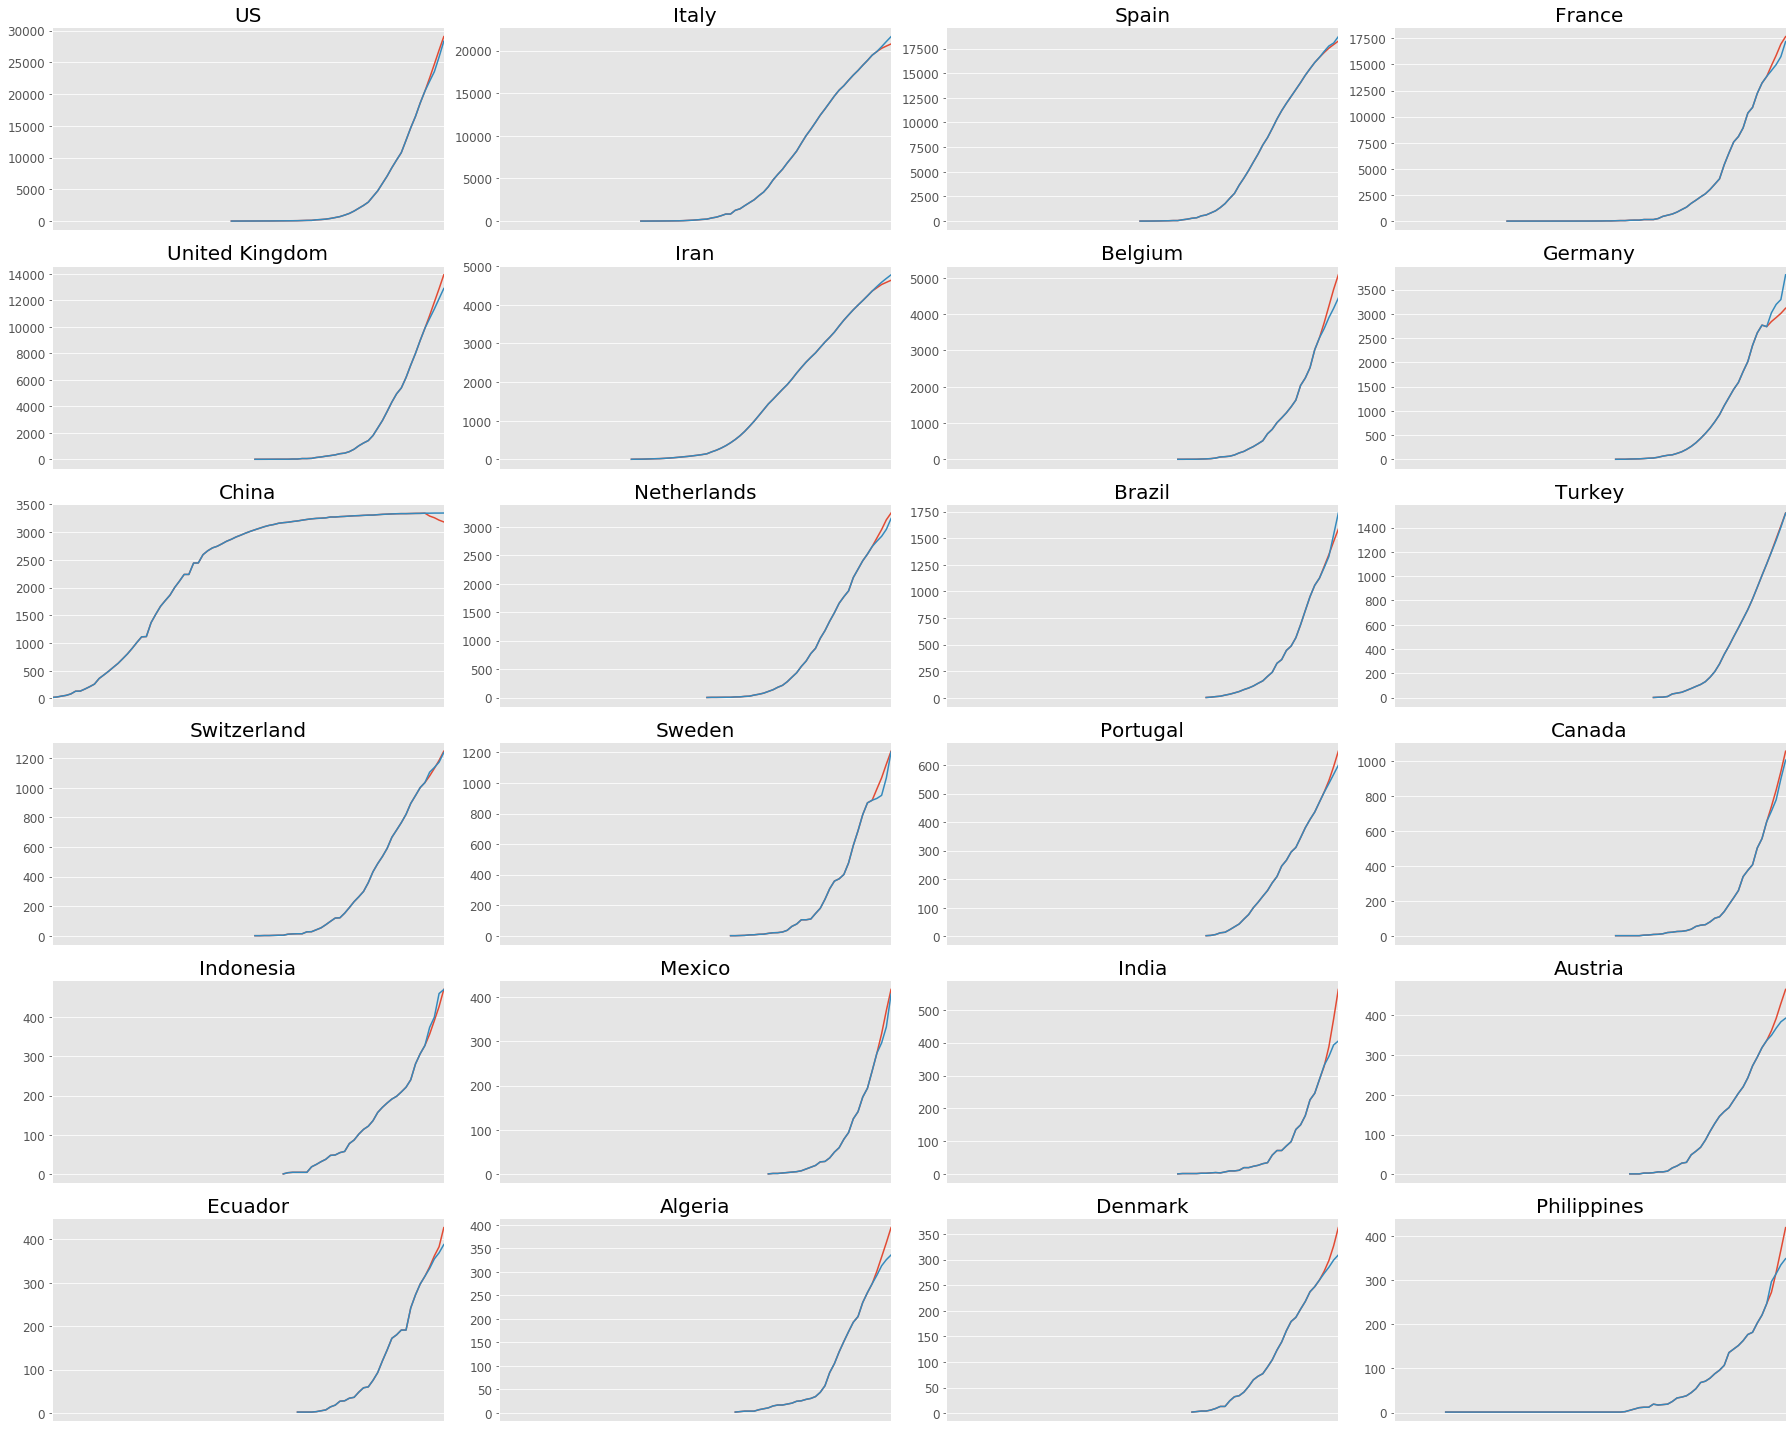

In [249]:
# Plot of predicted vs actual values for country. - red = pred
#Prediction['Germany'].plot(kind='line')
#Actual_values['Germany'].plot(kind='line')
#plt.show()

plt.figure(figsize=(25,20))
indx=1
for i in FocusCountries:
    
    plt.subplot(6,4,indx)
    plt.title(i, fontsize = 20)
    
    Prediction[i].plot(kind='line')
    Actual_values[i].plot(kind='line')
    
    plt.yticks(fontsize = 12)
    plt.xticks(fontsize = 20, rotation = 45)
    plt.xticks([])
    plt.xlabel('')
    indx=indx+1
plt.tight_layout()
plt.show()

The prediction model has now been tested and from the above chart it can also be seen that the prediction accuracy is good. Now is a interactive chart with future prediction for the next four days made. 

In [251]:
# Only using last observation for each country as test - the rest is training data. 
# making another key in order to know which rows should become test rows 
Country_Time_stats['traintestsplitkey'] = Country_Time_stats['DaysSinceOutbreak'].shift(-1)
Country_Time_stats.head()

# merging enriched data to corona data
Country_Time_stats= Country_Time_stats.merge(df_enriched, left_on=Country_Time_stats['Country'], right_on=df_enriched.index)
del Country_Time_stats['key_0']

In [252]:
# Updating the data for prediction. 

# Defining the features 
Features = ['Deaths','DaysSinceOutbreak', 'GrowthRate','death_lag0', 'death_lag1',
       'death_lag2', 'death_lag3', 'death_lag4','age_0-4', 'age_5-9', 'age_10-14', 'age_15-19', 'age_20-24',
       'age_25-29', 'age_30-34', 'age_35-39', 'age_40-44', 'age_45-49',
       'age_50-54', 'age_55-59', 'age_60-64', 'age_65-69', 'age_70-74',
       'age_75-79', 'age_80-84', 'age_85-89', 'age_90-94', 'age_95-99',
       'age_100+', 'total_pop', 'smokers_perc', 'density', 'urbanpop',
       'hospibed']

#Updating the X_test dataframe
Test = Country_Time_stats[Country_Time_stats.traintestsplitkey == 2]
X_test  = Test.loc[:, Features].values
X_test = Sc.transform(X_test)

In [253]:
# Prediction
y_pred2 = lin_model.predict(X_test)

In [254]:
#Adding predictions to test dataframe
Test['forecast1'] = y_pred2[:,0]
Test['forecast2'] = y_pred2[:,1]
Test['forecast3'] = y_pred2[:,2]
Test['forecast4'] = y_pred2[:,3]

/Users/kaspernielsen/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/kaspernielsen/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/kaspernielsen/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the 

In [255]:
# deleting unnecessary coulmns from tast dataframe
Test = Test.drop(columns=['Confirmed', 'Recovered',
       'DaysSinceOutbreak', 'GrowthRate', 'death_lag0', 'death_lag1',
       'death_lag2', 'death_lag3', 'death_lag4', 'death_future1',
       'death_future2', 'death_future3', 'death_future4', 'delete_check1',
       'delete_check2', 'delete_check3', 'delete_check4', 'traintestsplitkey','Deaths','Date',
        'age_0-4', 'age_5-9', 'age_10-14', 'age_15-19', 'age_20-24',
       'age_25-29', 'age_30-34', 'age_35-39', 'age_40-44', 'age_45-49',
       'age_50-54', 'age_55-59', 'age_60-64', 'age_65-69', 'age_70-74',
       'age_75-79', 'age_80-84', 'age_85-89', 'age_90-94', 'age_95-99',
       'age_100+', 'total_pop', 'smokers_perc', 'density', 'urbanpop',
       'hospibed','lung', 'femalelung', 'malelung'])

In [256]:
# Predicted values
prediction_values = Test.set_index('Country')
prediction_values = prediction_values.T

# Values before prediction starts
pre_prediction_values = Country_Time_stats[["Country","Deaths","Date"]].groupby(["Date","Country"]).sum().unstack()
pre_prediction_values = pd.DataFrame(data=pre_prediction_values)
pre_prediction_values = pre_prediction_values['Deaths']
# Dropping simbawe to match frames
pre_prediction_values = pre_prediction_values.drop(columns=['Zimbabwe'])

# Dataframe with predictions for plotting. - merging pre prediction values with prediction values
Prediction = pd.concat([pre_prediction_values,prediction_values], ignore_index=True)

In [257]:
Bokeh4 = Prediction[FocusCountries]
Bokeh4 = Bokeh4.apply(np.floor)

In [258]:
from bokeh.models import Span
source4 = ColumnDataSource(Bokeh4)

days = source4.data['index'].tolist()
days = [ str(x) for x in days ]

TOOLTIPS = [
    ("Day", "$index"),
    ("Country", "$name"),
    ("Death", "@$name"),
]
p = figure(x_range = FactorRange(factors=days), plot_height=500, plot_width = 1000, title="Country wise Forecast of COVID-19 Deaths",
           x_axis_label = 'Days since first death in world',y_axis_label = 'Death toll',tools='wheel_zoom',tooltips=TOOLTIPS)


line = {}
items = []
coloring = viridis(len(FocusCountries)) # making list of different colors


#Render glyph
for indx,i in enumerate(FocusCountries):
    line[i] = p.line(x='index',  y=i, source=source4,line_width=2, muted_alpha=0.3,muted_line_color=coloring[indx],
                    line_color=coloring[indx], muted=True, name=i)
    items.append((i,[line[i]]))

# Vertical line
vline = Span(location=83, dimension='height', line_color='grey', line_width=2)
p.renderers.extend([vline])
    
legend1 = Legend(items=items[0:12],click_policy='mute')
legend2 = Legend(items=items[12:24],click_policy='mute')
p.add_layout(legend1,'left')
p.add_layout(legend2,'left')


p.xaxis.major_label_orientation =3.1415/2
show(p)

From the chart we see that a high increase in casualties in the US is predicted, while the casualties in Inaly on the other hand id predicted to slow down. 

### True Number of Infected

Finally will the true number of infected in each countries be estimated. Throughout this entire notebook has the number of confirmed cases been used to very little since this number very much is affected on how well and agresively a country is testing. From litterature is is know that it takes approximately 17 days from you get infected until you die. This means that if the true mortality rate i 1% then if 1 person dies today was there 100 infected 17 days ago. This information can together with the avg growth rate for corona be used to give a estimate of the true number of infected in each country. 

In [260]:
# Defining Dataframe
Trueinfectednumber = Country_Time_stats[['Confirmed','Deaths','Recovered','Country',"Date",'GrowthRate']]
Trueinfectednumber['GrowthRate'] = Trueinfectednumber['GrowthRate'].mean()

/Users/kaspernielsen/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [261]:
# Calculating estimated doubling time in each country based on average growth rate. 
Trueinfectednumber['DoublingTime'] = 1/Trueinfectednumber['GrowthRate']
Trueinfectednumber

/Users/kaspernielsen/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Confirmed  Deaths  Recovered      Country       Date  GrowthRate  \
0            40       1          1  Afghanistan 2020-03-23    0.164756   
1            74       1          1  Afghanistan 2020-03-24    0.164756   
2            84       2          2  Afghanistan 2020-03-25    0.164756   
3            94       4          2  Afghanistan 2020-03-26    0.164756   
4           110       4          2  Afghanistan 2020-03-27    0.164756   
...         ...     ...        ...          ...        ...         ...   
3824         14       3          0     Zimbabwe 2020-04-11    0.164756   
3825         14       3          0     Zimbabwe 2020-04-12    0.164756   
3826         17       3          0     Zimbabwe 2020-04-13    0.164756   
3827         17       3          0     Zimbabwe 2020-04-14    0.164756   
3828         23       3          1     Zimbabwe 2020-04-15    0.164756   

      DoublingTime  
0         6.069585  
1         6.069585  
2         6.069585  
3         6.069585  
4         6.069585  
...            ...  
3824      6.069585  
3825      6.069585  
3826      6.069585  
3827      6.069585  
3828      6.069585  

[3829 rows x 7 columns]

In [262]:
# Changing number format
pd.set_option('display.float_format', lambda x: '%.3f' % x)
# Calculating the true number of infected based on best guess on 3 mortality rate scenarios. 
Trueinfectednumber['TrueNumberofInfected_5%'] = (Trueinfectednumber['Deaths']/0.05)*(2*np.exp(17/Trueinfectednumber['DoublingTime']))
Trueinfectednumber['TrueNumberofInfected_3%'] = (Trueinfectednumber['Deaths']/0.03)*(2*np.exp(17/Trueinfectednumber['DoublingTime']))
Trueinfectednumber['TrueNumberofInfected_1%'] = (Trueinfectednumber['Deaths']/0.01)*(2*np.exp(17/Trueinfectednumber['DoublingTime']))

/Users/kaspernielsen/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/kaspernielsen/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/kaspernielsen/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the 

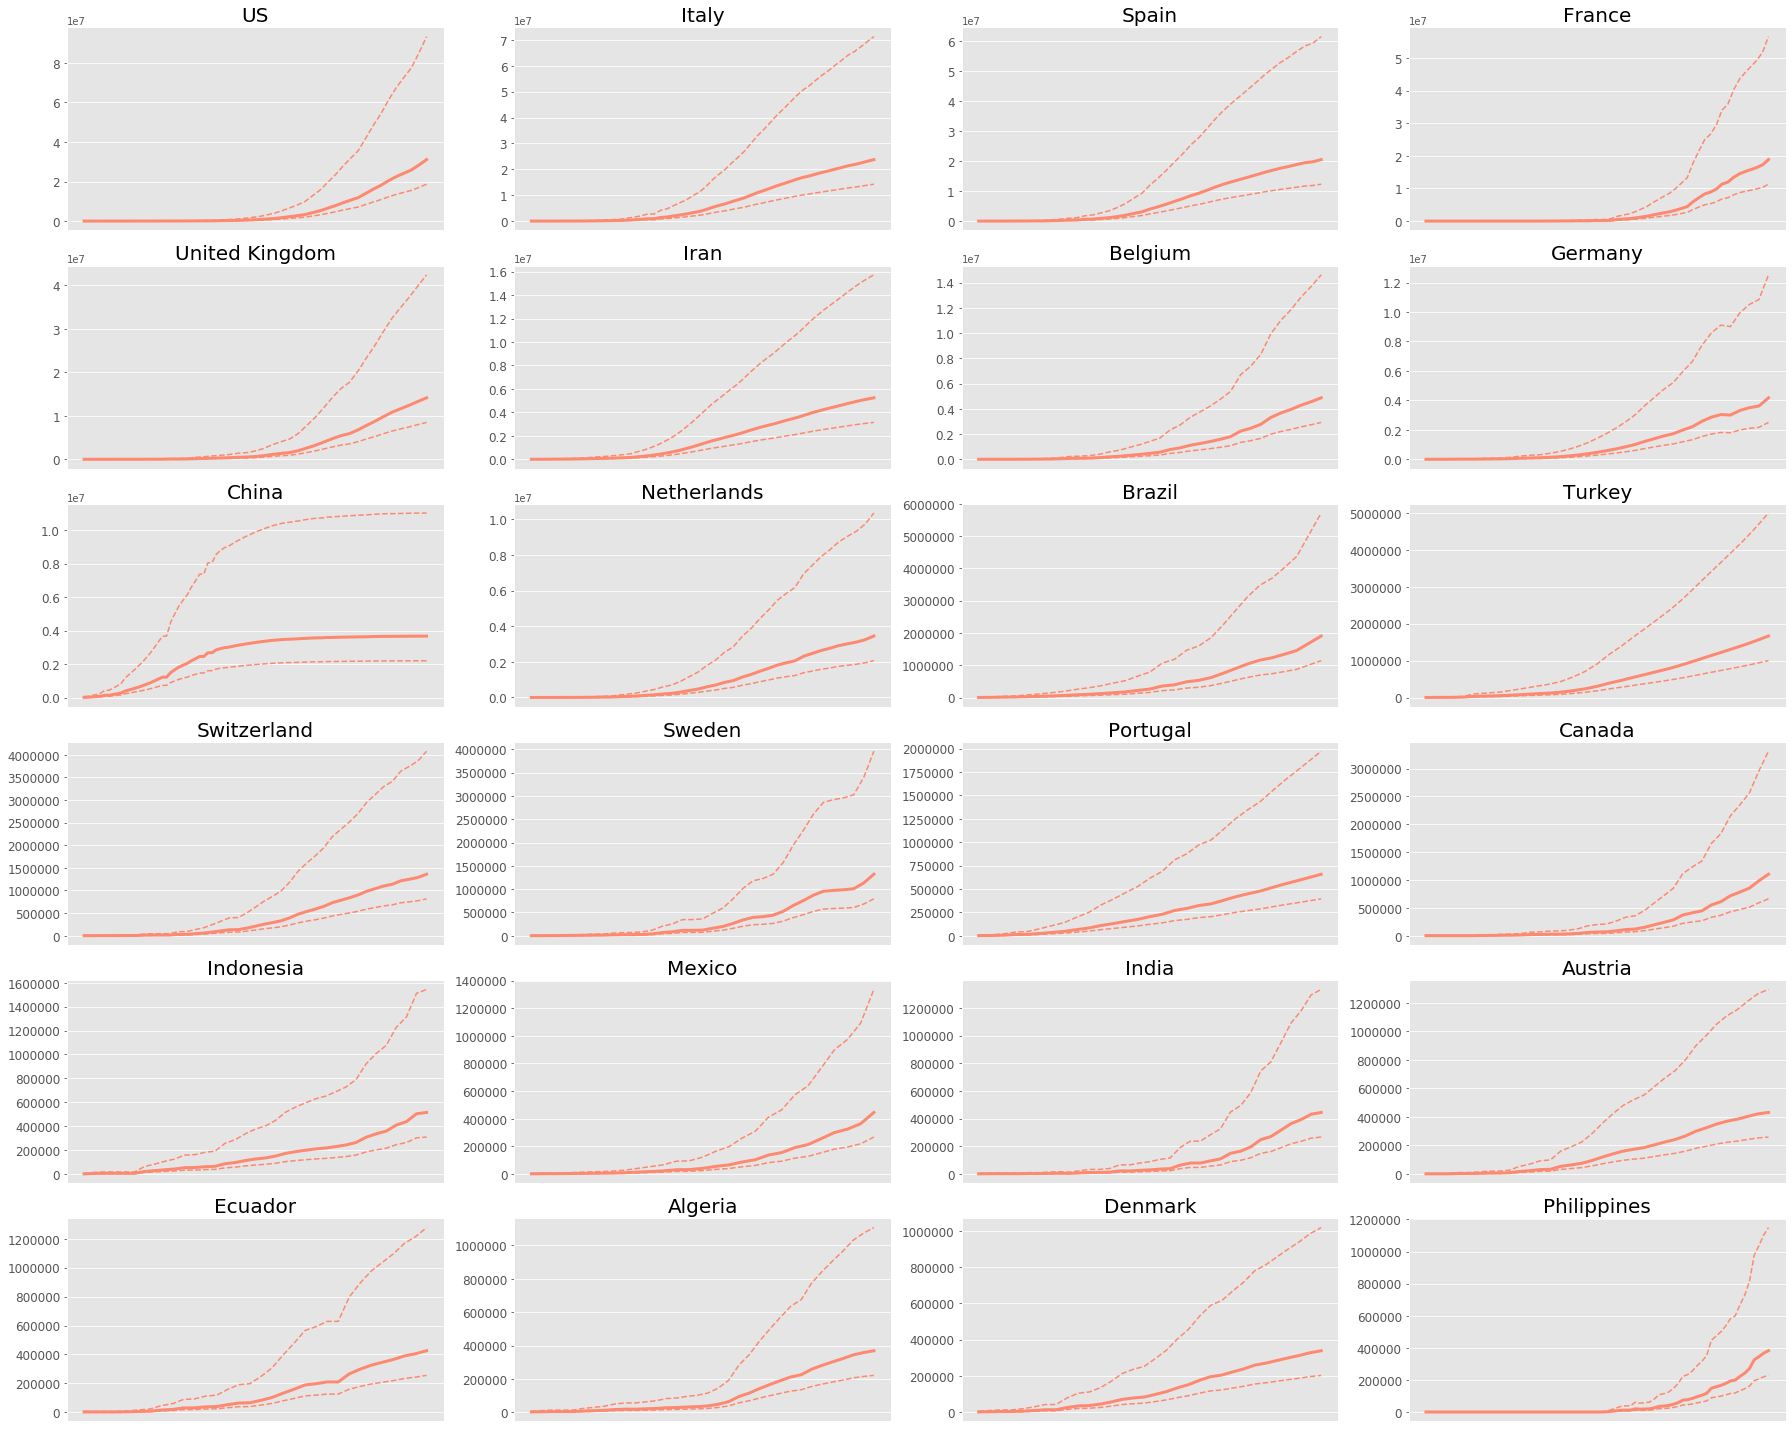

In [264]:
# Plotting true infected number for all countries. 
plt.figure(figsize=(25,20))
for i, elem in enumerate(FocusCountries):
    plt.subplot(6,4,i+1)
    plt.title(elem, fontsize = 20)
    temp_df = Trueinfectednumber[Trueinfectednumber.Country.isin([elem])]
    
    plt.plot(temp_df['Date'],temp_df['TrueNumberofInfected_1%'],'--',c="#FC8970")
    plt.plot(temp_df['Date'],temp_df['TrueNumberofInfected_3%'],c="#FC8970",linewidth=3)
    plt.plot(temp_df['Date'],temp_df['TrueNumberofInfected_5%'],'--',c="#FC8970")
    
    plt.yticks(fontsize = 12)
    #plt.xticks(fontsize = 20, rotation = 45)
    plt.xticks([])
    plt.xlabel('')
plt.tight_layout()
plt.show()